<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202a/BigMac/BigMacVAEXAssignment_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset: Health Insurance Marketplace**

**Group members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>Muhammad Imran Hakimi Bin Mohd Shukri </th>
    <th>A20EC0213</th>
  </tr>
  <tr>
    <th>Afif Hazmie Arsyad Bin Agus</th>
    <th>A20EC0176</th>
  </tr>
    <tr>
    <th>Kong Jia Rou</th>
    <th>A20EC0198</th>
  </tr>
    <tr>
    <th>Rasmin Kaur Sandhu</th>
    <th>A19ET0216</th>
  </tr>
</table>

##**What is Vaex?**

Vaex is a high performance Python library for lazy Out-of-Core DataFrames (similar to Pandas), to visualize and explore big tabular datasets. It calculates statistics such as mean, sum, count, standard deviation etc, on an N-dimensional grid for more than a billion (10^9) samples/rows per second. Visualization is done using histograms, density plots and 3d volume rendering, allowing interactive exploration of big data. Vaex uses memory mapping, zero memory copy policy and lazy computations for best performance (no memory wasted).

In this project, we will show how to install and examples on how to use this library by using the medical dataset [Rate.csv](https://www.kaggle.com/datasets/hhs/health-insurance-marketplace?select=Rate.csv). 

###**Connect GDrive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Pull dataset from my google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/110mZHE08iW3Kbio-XCcASizLcpU2qFAV/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Rate.csv') 

###**Install Vaex**

In [ ]:
!pip install vaex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.3/510.3 KB 3

##Importing Vaex Library

In [3]:
import vaex as vx

###**Reading CSV File**

In [4]:
%%time
df_vx=vx.open("/content/drive/MyDrive/Colab Notebooks/Rate.csv")


CPU times: user 1.76 s, sys: 725 ms, total: 2.48 s
Wall time: 4.85 s


###**Viewing Dataset**

In [6]:
%%time
df_vx.head()

CPU times: user 228 µs, sys: 807 µs, total: 1.03 ms
Wall time: 1.03 ms


#,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29,--,--,--,--,--,--,--,--,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,--,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,--,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32,--,--,--,--,--,--,--,--,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32,--,--,--,--,--,--,--,--,16
5,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 3,No Preference,Family Option,36.95,--,73.9,107.61,107.61,107.61,144.56,144.56,144.56,16
6,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020002,Rating Area 1,No Preference,Family Option,32.45,--,64.9,94.5,94.5,94.5,126.95,126.95,126.95,17
7,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,23,32,--,--,--,--,--,--,--,--,17
8,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,24,32,--,--,--,--,--,--,--,--,18
9,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020002,Rating Area 2,No Preference,Family Option,32.45,--,64.9,94.5,94.5,94.5,126.95,126.95,126.95,18


# **Data Cleaning**

In [7]:
#dropping NaN with vaex
%%time
df_vx.dropnan()

CPU times: user 801 ms, sys: 175 ms, total: 977 ms
Wall time: 1.11 s


###**Virtual Column**

In [8]:
#creating new column with vaex (will create a virtual column)
%%time
df_vx['new_TotalIndividualRate'] = df_vx['IndividualRate'] * 100
df_vx['new_TotalIndividualRate'] = df_vx['new_TotalIndividualRate'].round(decimals = 2)
df_vx

CPU times: user 1.93 ms, sys: 976 µs, total: 2.9 ms
Wall time: 2.3 ms


#,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber,new_TotalIndividualRate
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.0,--,--,--,--,--,--,--,--,14,2900.0
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,--,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14,3695.0
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,--,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15,3695.0
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.0,--,--,--,--,--,--,--,--,15,3200.0
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.0,--,--,--,--,--,--,--,--,16,3200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"12,694,440",2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,96480WV0090003,Rating Area 11,No Preference,61,14.05,--,--,--,--,--,--,--,--,2033,1405.0
"12,694,441",2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,96480WV0090003,Rating Area 11,No Preference,62,14.05,--,--,--,--,--,--,--,--,2034,1405.0
"12,694,442",2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,96480WV0090003,Rating Area 11,No Preference,63,14.05,--,--,--,--,--,--,--,--,2035,1405.0
"12,694,443",2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,96480WV0090003,Rating Area 11,No Preference,64,14.05,--,--,--,--,--,--,--,--,2036,1405.0


###**Selections and filtering**

In [9]:
%%time
df_vx = df_vx[df_vx.IndividualRate > 32]
df_vx[['BusinessYear', 'Age', 'IndividualRate', 'new_TotalIndividualRate']]

CPU times: user 3.91 ms, sys: 5.23 ms, total: 9.13 ms
Wall time: 9.36 ms


#,BusinessYear,Age,IndividualRate,new_TotalIndividualRate
0,2014,Family Option,36.95,3695.0
1,2014,Family Option,36.95,3695.0
2,2014,Family Option,36.95,3695.0
3,2014,Family Option,32.45,3245.0
4,2014,Family Option,32.45,3245.0
...,...,...,...,...
"9,155,808",2016,61,99.99,9999.0
"9,155,809",2016,62,99.99,9999.0
"9,155,810",2016,63,99.99,9999.0
"9,155,811",2016,64,99.99,9999.0


##**Statistics Performance**

In [10]:
%%time
df_vx.mean(df_vx['IndividualRate'])

CPU times: user 6.51 s, sys: 1.13 s, total: 7.64 s
Wall time: 5.14 s


array(5674.71155652)

###**Visualization**

CPU times: user 19.2 s, sys: 4.01 s, total: 23.2 s
Wall time: 15.9 s


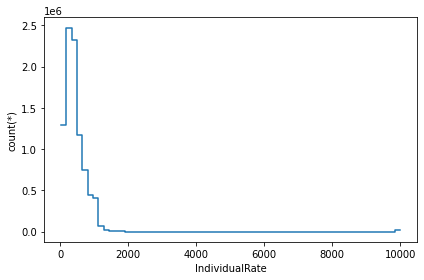

In [11]:
%%time
df_vx.viz.histogram(df_vx.IndividualRate, limits='99.7%')